<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Demo-of-EDA-Functions" data-toc-modified-id="Demo-of-EDA-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Demo of EDA Functions</a></span><ul class="toc-item"><li><span><a href="#DataFrame-Values" data-toc-modified-id="DataFrame-Values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DataFrame Values</a></span></li><li><span><a href="#Distribution-Plots" data-toc-modified-id="Distribution-Plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Distribution Plots</a></span></li><li><span><a href="#Correlation-Plots" data-toc-modified-id="Correlation-Plots-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Correlation Plots</a></span></li><li><span><a href="#Cumulative-Sums-/-Counts" data-toc-modified-id="Cumulative-Sums-/-Counts-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Cumulative Sums / Counts</a></span></li></ul></li><li><span><a href="#Some-Additional-Ideas-(WIP)" data-toc-modified-id="Some-Additional-Ideas-(WIP)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Some Additional Ideas (WIP)</a></span></li></ul></div>

In [1]:
import datetime as dt
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(sys.executable)
print(sys.version)
print(f"Pandas {pd.__version__}")
print(f"Seaborn {sns.__version__}")

C:\Users\r2d4\miniconda3\envs\py3\python.exe
3.8.3 (default, May 19 2020, 06:50:17) [MSC v.1916 64 bit (AMD64)]
Pandas 1.1.3
Seaborn 0.11.0


In [3]:
sys.path.append(str(Path.cwd().parent / 'src'))

In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
plt.style.use('raph-base')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('precision', 2)
pd.set_option('display.max_columns', 30)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)

In [5]:
import src.EDA as EDA
import src.clean as clean

## Load Data

In [7]:
df = pd.read_csv("../data/realWorldTestData.csv", 
                 low_memory=False, 
                 nrows=1000,
                 usecols=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18]
                 )

# Just for demo / test purpose: Encode the binary target col in different dtypes
df["target_num"] = np.where(df["target_event"] == "ACTIVE", 1, 0)
df["target_bool"] = df["target_num"].astype("bool")

# For test purposes, create some missing values
df["SUM_INVOICE_AMOUNT"] = df["SUM_INVOICE_AMOUNT"].replace(0, np.nan)  

df = clean.prettify_column_names(df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   target_event                   1000 non-null   object 
 1   num_consec_services            1000 non-null   int64  
 2   sum_invoice_amount_in_service  1000 non-null   float64
 3   sum_invoice_amount             739 non-null    float64
 4   num_events                     1000 non-null   int64  
 5   first_evt                      1000 non-null   object 
 6   last_evt                       1000 non-null   object 
 7   last_mileage                   1000 non-null   float64
 8   mean_mileage_per_mnth          1000 non-null   float64
 9   avg_diff_mnth                  1000 non-null   int64  
 10  age_mnth                       1000 non-null   int64  
 11  kanton_licence_plate           991 non-null    object 
 12  inspection_interval_uid        1000 non-null   ob

## Demo of EDA Functions 
### DataFrame Values

In [9]:
EDA.display_distinct_values(df)

,#_distinct_values
Column,
target_event,2
num_consec_services,10
sum_invoice_amount_in_service,47
sum_invoice_amount,713
num_events,37
first_evt,727
last_evt,544
last_mileage,991
mean_mileage_per_mnth,999


In [10]:
EDA.display_value_counts(df[["target_event", "num_consec_services"]], n_rows=3)

,counts,prop,cum_prop
ACTIVE,710,71.0%,71.0%
CHURN,290,29.0%,100.0%


,counts,prop,cum_prop
1,384,38.4%,38.4%
2,255,25.5%,63.9%
3,181,18.1%,82.0%


In [11]:
EDA.display_df_sample_transposed(df, random_state=None)

,39,961,892,417,588
target_event,ACTIVE,CHURN,ACTIVE,ACTIVE,ACTIVE
num_consec_services,2,7,1,1,2
sum_invoice_amount_in_service,0,0,0,0,0
sum_invoice_amount,NaN,NaN,1e+03,7.1e+02,NaN
num_events,12,23,9,9,6
first_evt,2009-06-19 00:00:00.0000000,2006-07-04 00:00:00.0000000,2013-07-22 00:00:00.0000000,2014-04-25 00:00:00.0000000,2011-11-11 00:00:00.0000000
last_evt,2014-08-13 00:00:00.0000000,2014-04-30 00:00:00.0000000,2015-11-06 00:00:00.0000000,2016-04-28 00:00:00.0000000,2015-07-02 00:00:00.0000000
last_mileage,5.8e+04,1e+05,4.9e+04,4e+04,1.9e+04
mean_mileage_per_mnth,9.3e+02,1.1e+03,1.7e+03,1.7e+03,4.4e+02
avg_diff_mnth,5,4,3,2,7


**dtype "category":** Based on this information we can now encode some of the features as dtype "category". This is especially important for features that ar of dtype "object" originally. So we can  analyze their correlations to other variables later. 

(Note: This works also for numeric features with discrete values, but is not recommended if not necessary because of memory constraints.)

In [12]:
for col in [
    "target_event",
    "kanton_licence_plate",
    "inspection_interval_uid",
    "car_brand_uid"
]:
    df[col] = df[col].astype("category")

In [13]:
# Now we can count the different dtypes in the frame

EDA.display_dtypes(df)

,# cols
bool,1
category,4
float64,4
int32,1
int64,4
object,2


In [29]:
# List missing values

EDA.display_nan(df)

,total,prop,dtype
sum_invoice_amount,261,26.1%,float64
kanton_licence_plate,9,0.9%,category


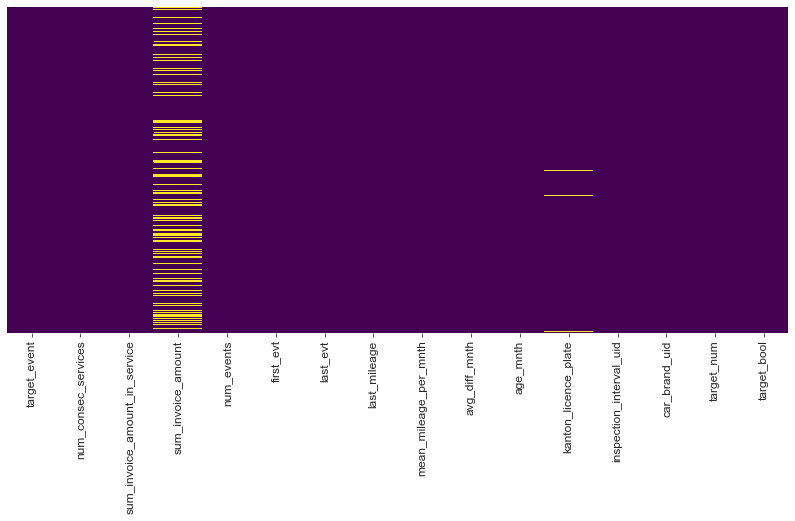

In [30]:
# Visualize missing values

EDA.plot_nan(df)

In [37]:
# Check for duplictates

EDA.display_duplicates(df[["last_mileage", "age_mnth"]])

Number of column-wise duplicates per column:
- last_mileage: 6 unique duplicated values (15 duplicated rows)
- age_mnth: 100 unique duplicated values (997 duplicated rows)


### Distribution Plots

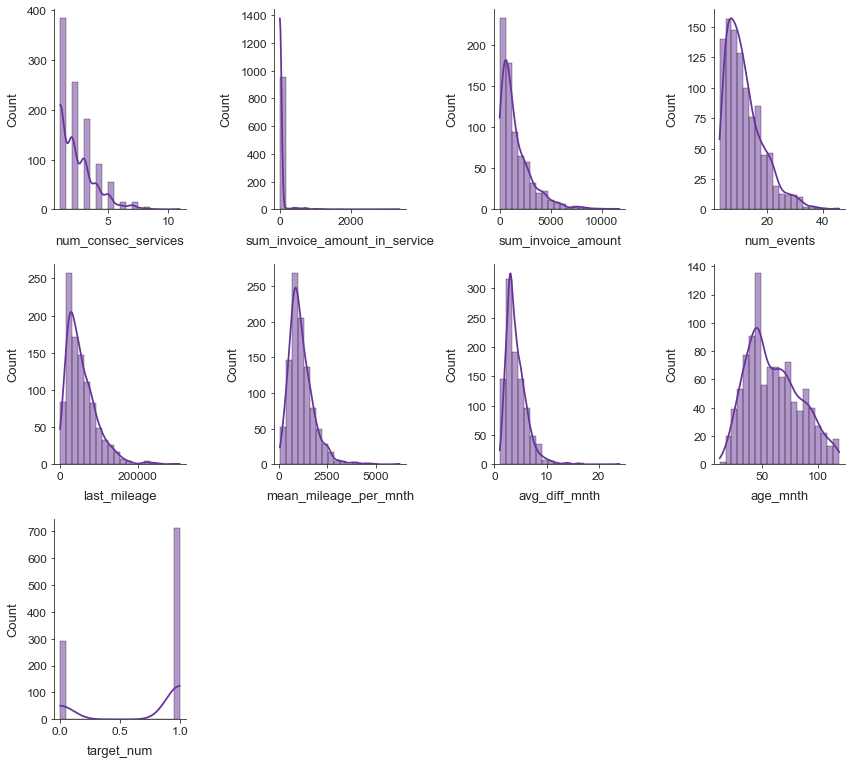

In [14]:
# All numeric columns

EDA.plot_distr_histograms(df, bins=20, kde=True)

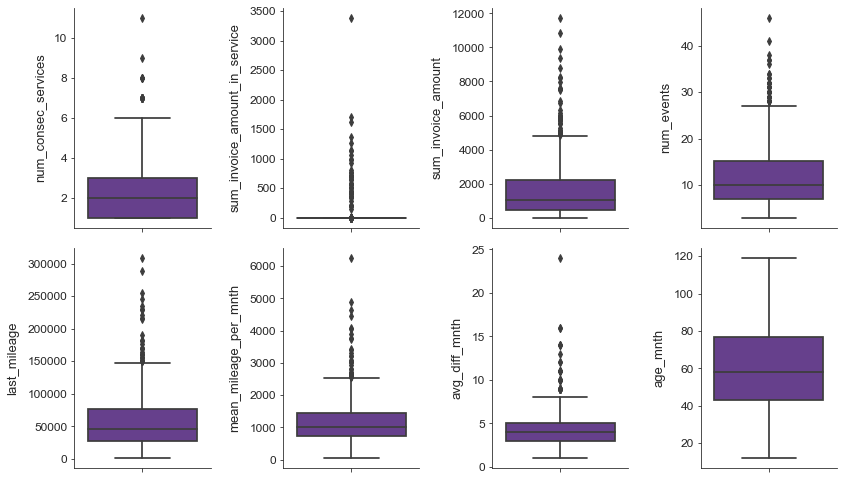

In [15]:
# All numeric columns

EDA.plot_distr_boxplots(df.iloc[:, :-2])

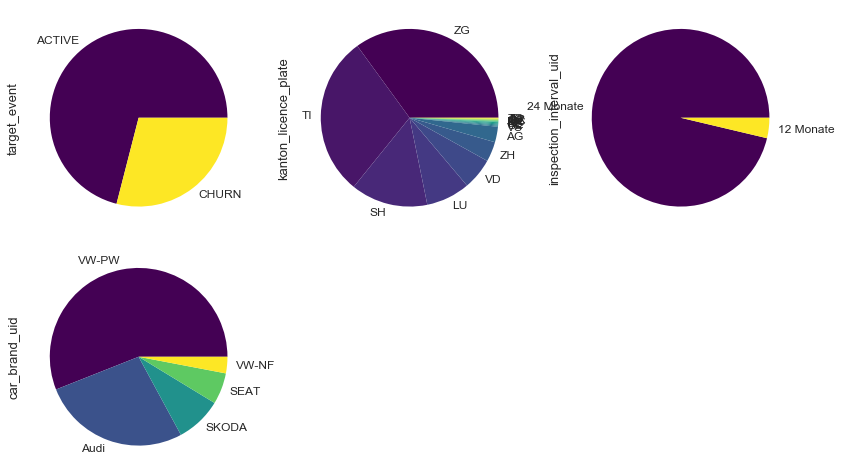

In [16]:
# Columns with dtype "category" only

EDA.plot_distr_pies(df)

### Correlation Plots

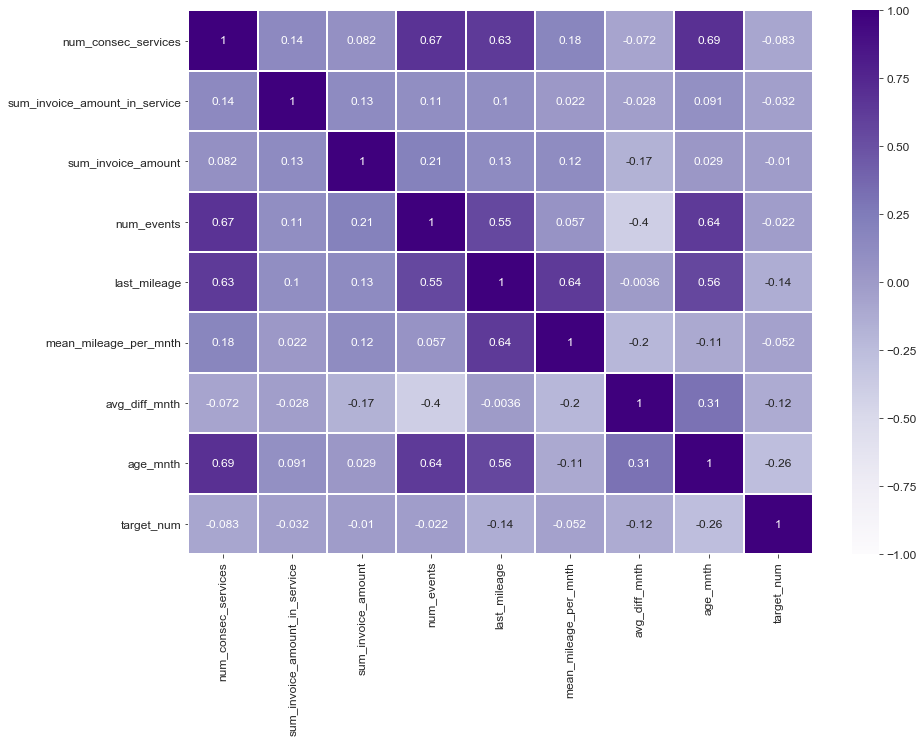

In [17]:
# All numeric columns

EDA.plot_corr_full_heatmap(df, cmap="Purples")

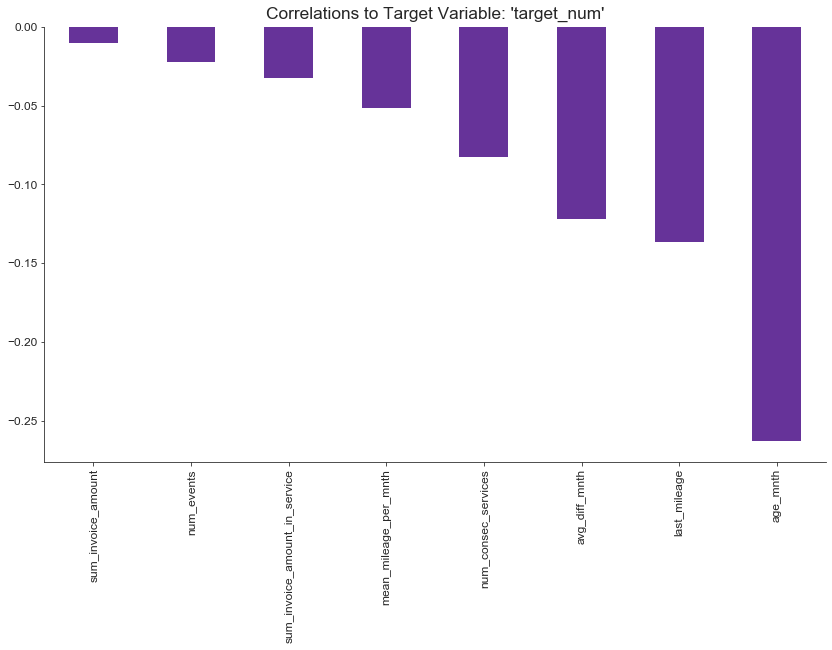

In [18]:
# All numeric features to numeric target variable
# Note: it is a coincidence that all values are negative here ...

EDA.plot_corr_to_target_barchart(df, "target_num")

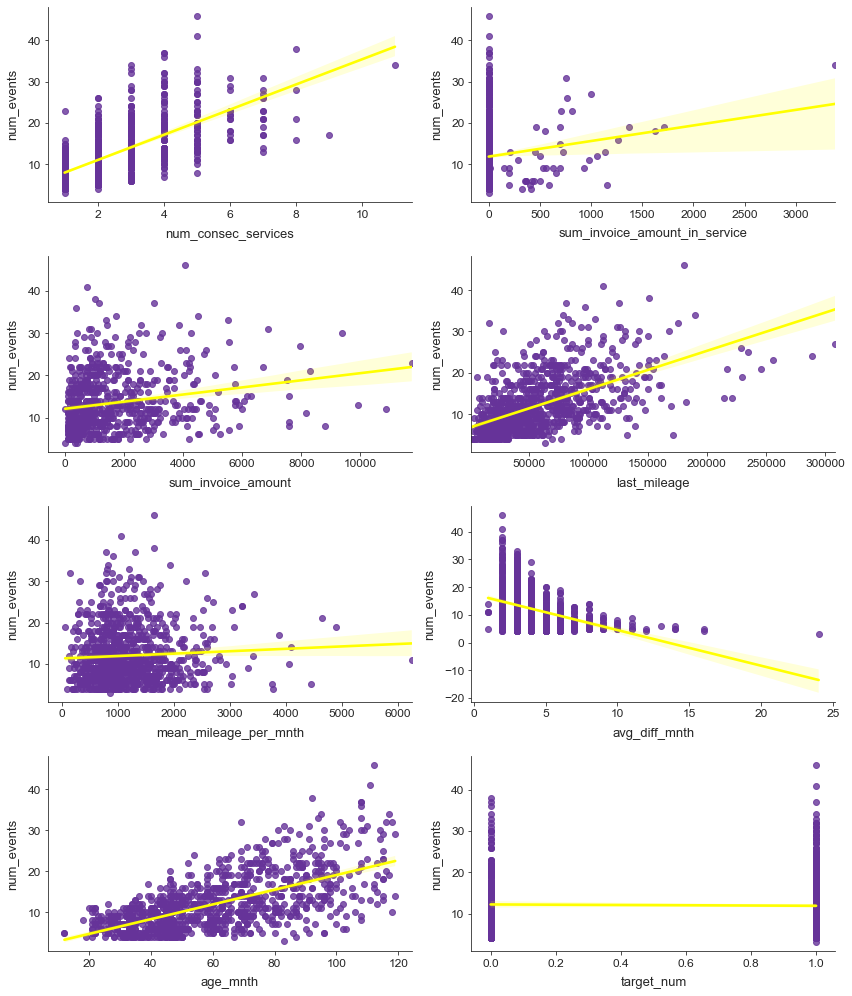

In [19]:
# All numeric features to numeric target variable

EDA.plot_corr_to_target_regplots(df, "num_events")

Only columns with up to 100 distinct values are shown.


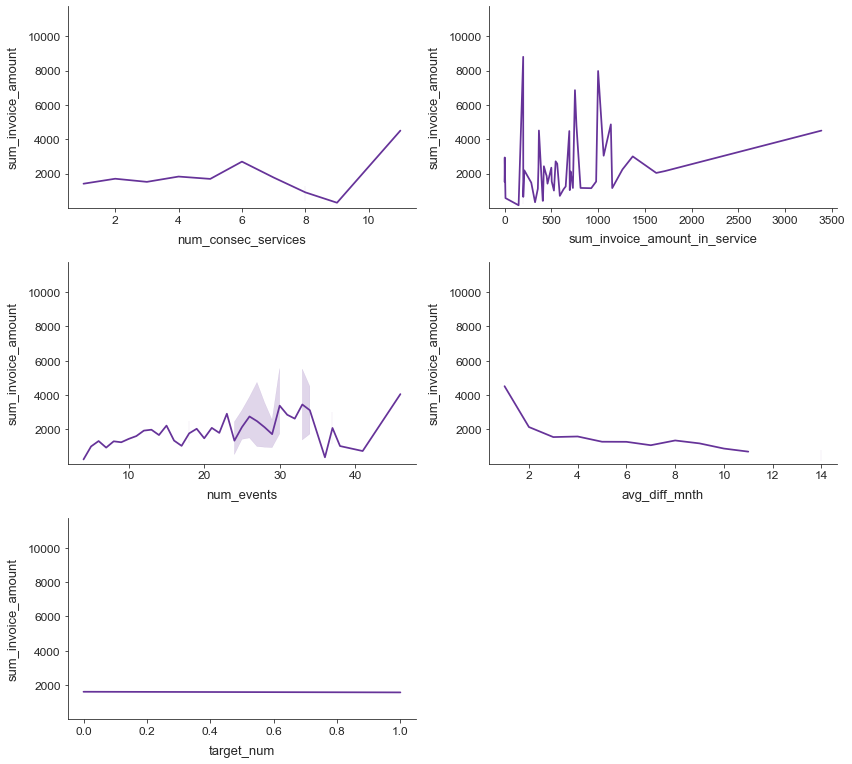

In [20]:
# Numerical features with up to (by default) 100 distinct values

EDA.plot_corr_to_target_lineplots(df, "sum_invoice_amount")

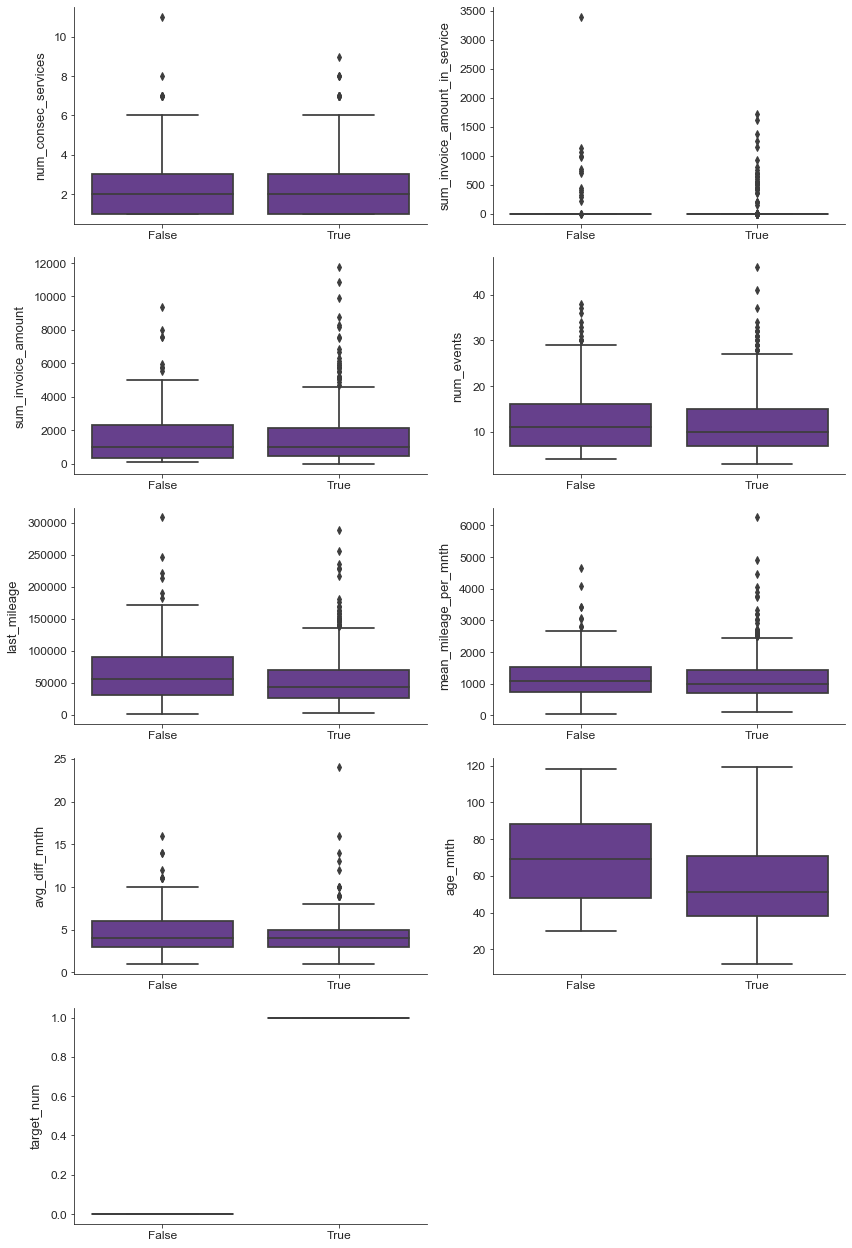

In [21]:
# Numerical features to categorical / discrete target 
# dtype of target can be any kind, but should be discrete and have few distinct values

EDA.plot_corr_to_target_boxplots(df, "target_bool")

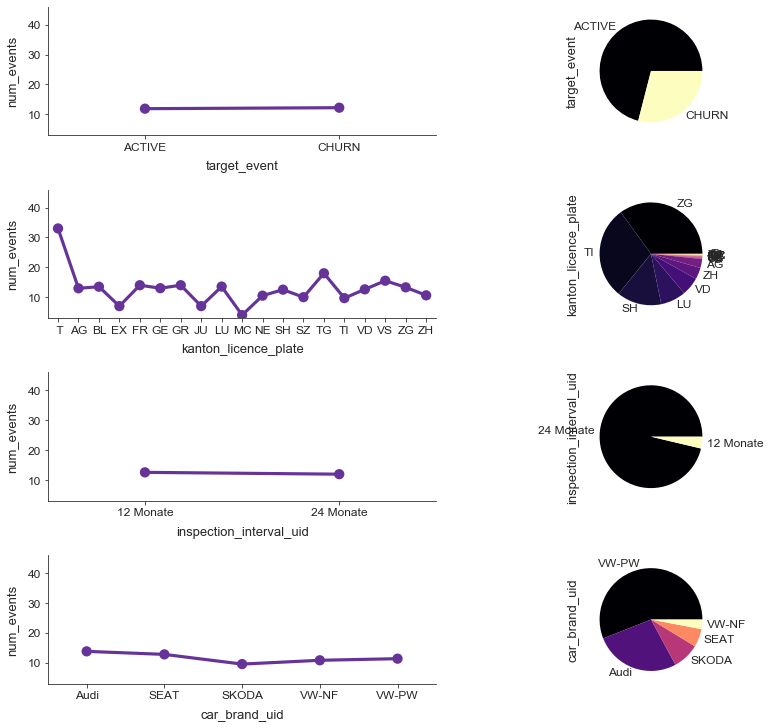

In [22]:
# Categorical features to numerical target 
# Accepts categorical type only for features

EDA.plot_corr_to_target_pointplots_with_pies(df, "num_events")

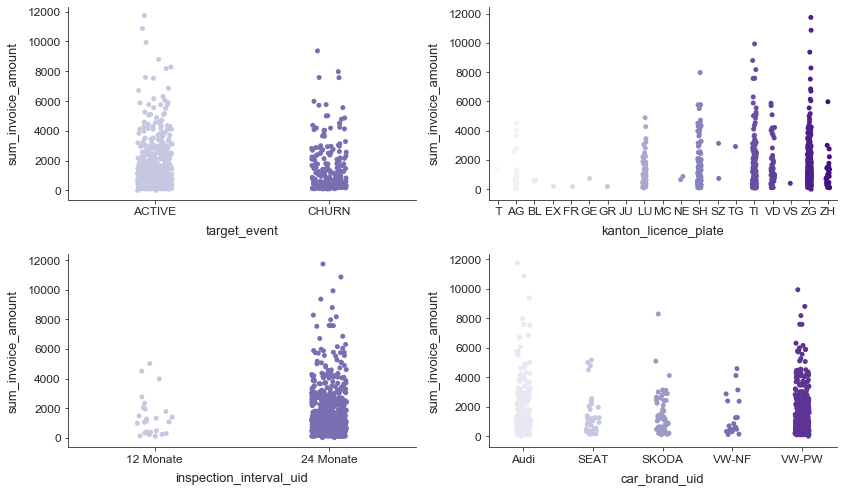

In [23]:
# Categorical features to numeric target
# Accepts categorical type only for features

EDA.plot_corr_to_target_stripplots(
    df,
    "sum_invoice_amount",
    palette="Purples"
)

### Cumulative Sums / Counts

Attention: 261 instances with missing value not included.


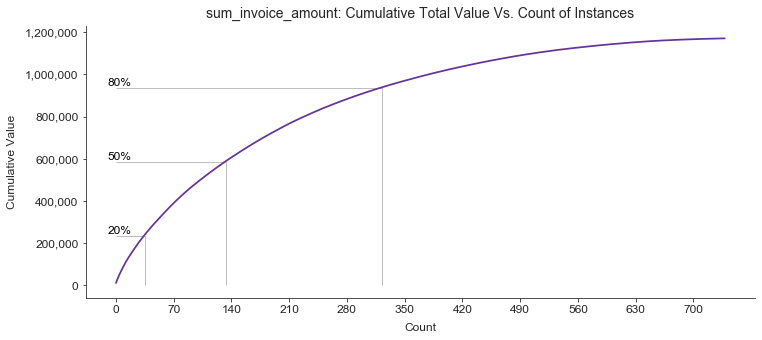

In [24]:
df["sum_invoice_amount"] = df["sum_invoice_amount"].replace(0, np.nan)  # for test purposes

EDA.plot_cumsum_curve(df["sum_invoice_amount"])

In [25]:
EDA.display_cumcurve_stats(df["sum_invoice_amount"], np.arange(0.2, 1.2, 0.2))

Attention: 261 instances with missing value not included.


,total_cum_value,lowest_value_in_bin,total_cum_count,total_cum_count_prop
value_threshold,,,,
20%,"236,294.63","4,996.00",35,5.0%
40%,"468,541.38","3,220.80",93,13.0%
60%,"703,825.23","2,207.55",181,24.0%
80%,"937,492.39","1,195.40",322,44.0%
100%,"1,171,104.45",1.00,739,100.0%


---

## Some Additional Ideas (WIP)

These are not implemented in the package

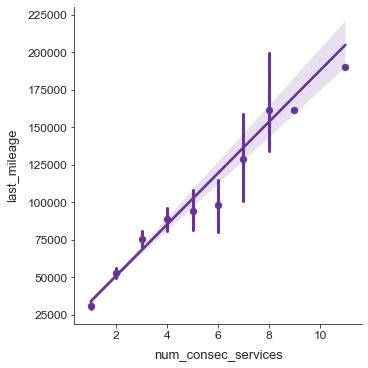

In [26]:
# Discrete bin to plot an estimate of central tendency along with a confidence interval 
# (both axes have to be numeric)

sns.lmplot(
    x="num_consec_services",
    y="last_mileage", data=df,
    x_estimator=np.mean
);

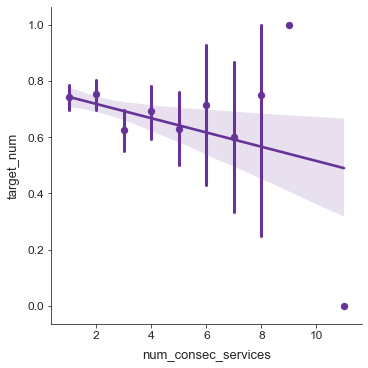

In [27]:
# Also good for discrete numeric values

sns.lmplot(
    x="num_consec_services", 
    y="target_num",
    data=df,
    x_estimator=np.mean
);

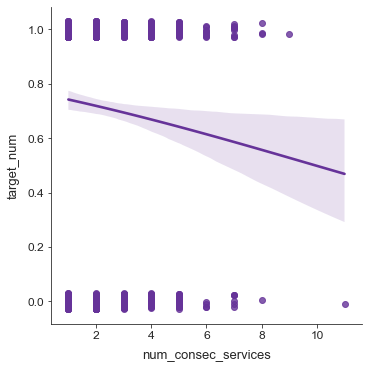

In [28]:
# LM plot for binary log regression - binary (numeric) target, numeric features

sns.lmplot(
    x="num_consec_services",
    y="target_num",
    data=df,
    logistic=True,
    y_jitter=.03);